In [2]:
import matplotlib.pyplot as plt
import random
import pandas as pd

1. Escribir un programa que pregunte al usuario por las ventas de un rango de años y muestre por pantalla un diagrama de líneas con la evolución de las ventas.

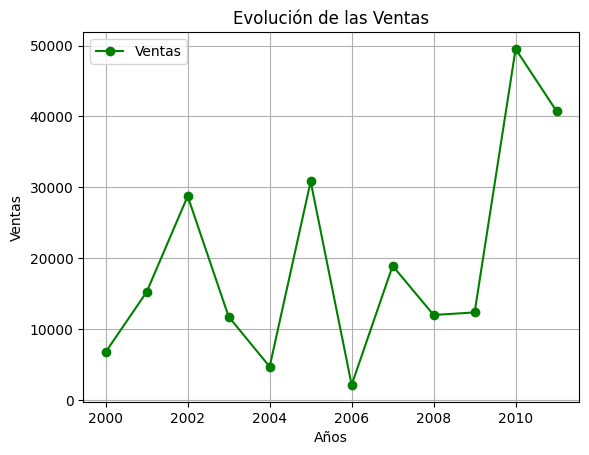

In [2]:
inicio = int(input("Introduce el año de inicio: "))
fin = int(input("Introduce el año de fin: "))

años = list(range(inicio, fin + 1))
ventas = []

for año in años:
    venta = random.uniform(1000, 50000)
    ventas.append(venta)

plt.plot(años, ventas, marker='o', linestyle='-', color='g', label='Ventas')

plt.xlabel("Años")
plt.ylabel("Ventas")
plt.title("Evolución de las Ventas")
plt.grid(True)
plt.legend()

plt.show()


2. Escribir una función que reciba un diccionario con las notas de las asignaturas de un curso y una cadena con el nombre de un color y devuelva un diagrama de barras de las notas en el color dado.

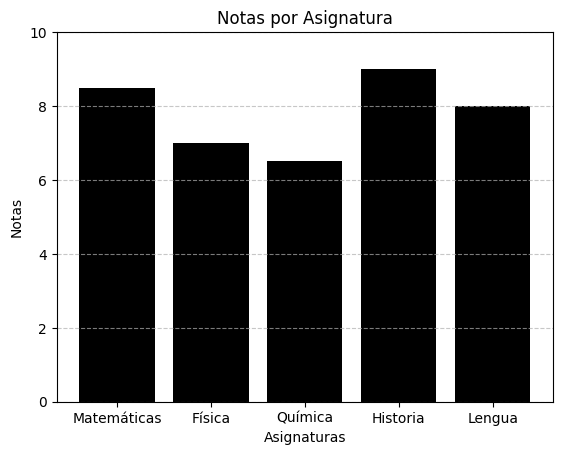

In [3]:
def graficar_notas(notas, color):
   
    asignaturas = list(notas.keys())
    valores = list(notas.values())
    
    plt.bar(asignaturas, valores, color=color)
    
    plt.xlabel("Asignaturas")
    plt.ylabel("Notas")
    plt.title("Notas por Asignatura")
    plt.ylim(0, 10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.show()

notas_curso = {
    "Matemáticas": 8.5,
    "Física": 7.0,
    "Química": 6.5,
    "Historia": 9.0,
    "Lengua": 8.0
}

graficar_notas(notas_curso, "black")


3. Escribir una función que reciba una serie de Pandas con las notas de los alumnos de un curso y devuelva un diagrama de cajas con las notas. El diagrama debe tener el título “Distribución de notas”.

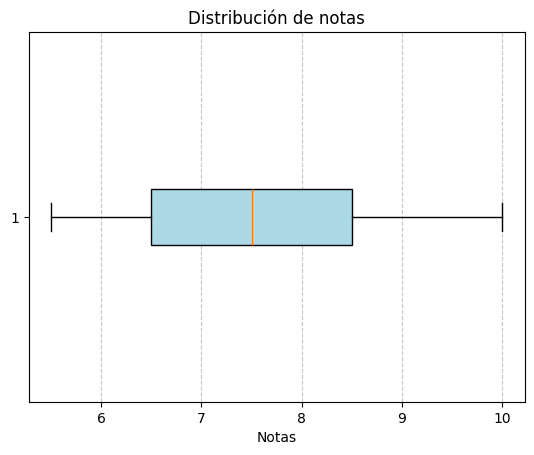

In [4]:
def diagrama_cajas_notas(notas_serie):
    
    plt.boxplot(notas_serie, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    
    plt.title("Distribución de notas")
    plt.xlabel("Notas")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    plt.show()

notas_alumnos = pd.Series([8.5, 7.0, 6.5, 9.0, 8.0, 5.5, 7.5, 10.0, 6.0])
diagrama_cajas_notas(notas_alumnos)


4. El fichero bancos.csv contiene las cotizaciones de los principales bancos de España con : Empresa (nombre de la empresa), Apertura (precio de la acción a la apertura de bolsa), Máximo (precio máximo de la acción durante la jornada), Mínimo (precio mínimo de la acción durante la jornada), Cierre (precio de la acción al cierre de bolsa), Volumen (volumen al cierre de bolsa). Construir una función reciba el fichero bancos.csv y cree un diagrama de líneas con las series temporales de las cotizaciones de cierre de cada banco.

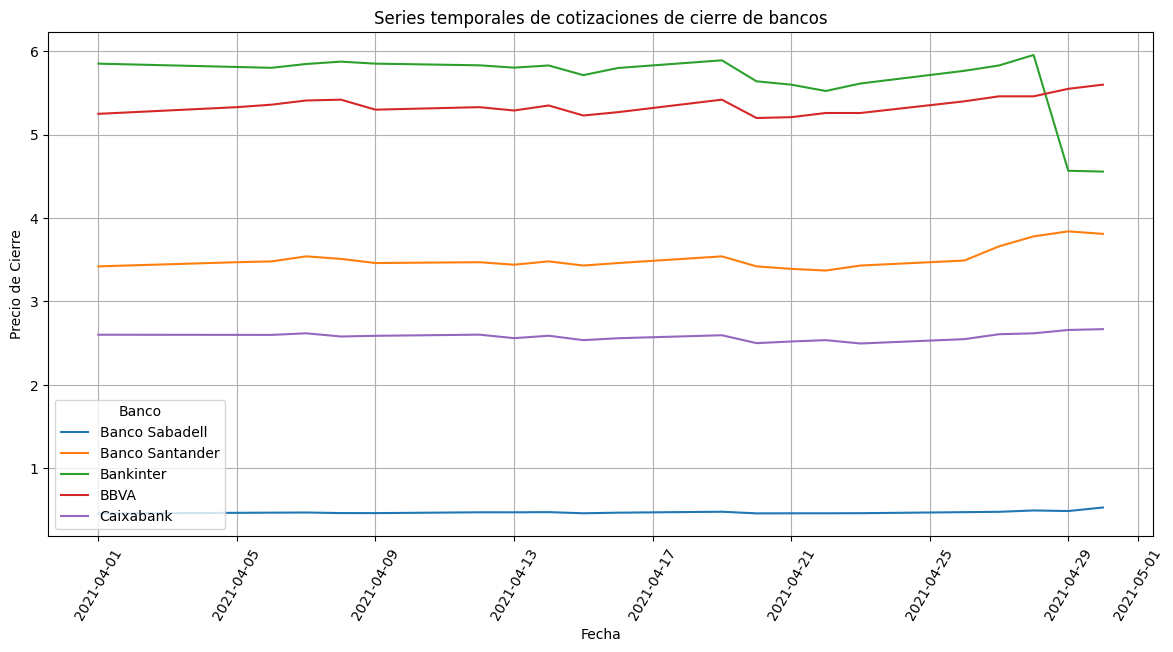

In [5]:
def plot_closing_prices(file_path):
    
    data = pd.read_csv(file_path)
    
    data['Fecha'] = pd.to_datetime(data['Fecha'])
    
    plt.figure(figsize=(12, 6))
    for empresa in data['Empresa'].unique():
        banco_data = data[data['Empresa'] == empresa]
        plt.plot(banco_data['Fecha'], banco_data['Cierre'], label=empresa)
    
    plt.title('Series temporales de cotizaciones de cierre de bancos')
    plt.xlabel('Fecha')
    plt.ylabel('Precio de Cierre')
    plt.legend(title='Banco')
    plt.grid(True)
    plt.tight_layout()
    
    plt.xticks(rotation=60)
    
    plt.show()

file_path = 'bancos.csv'

plot_closing_prices(file_path)



5. El fichero titanic.csv contiene información sobre los pasajeros del Titanic. Crear un dataframe con Pandas y a partir de él generar los siguientes diagramas.
- Diagrama de sectores con los fallecidos y supervivientes.
- Histograma con las edades.
- Diagrama de barras con el número de personas en cada clase.
- Diagrama de barras con el número de personas fallecidas y supervivientes en cada clase.

- Diagrama de sectores con los fallecidos y supervivientes.

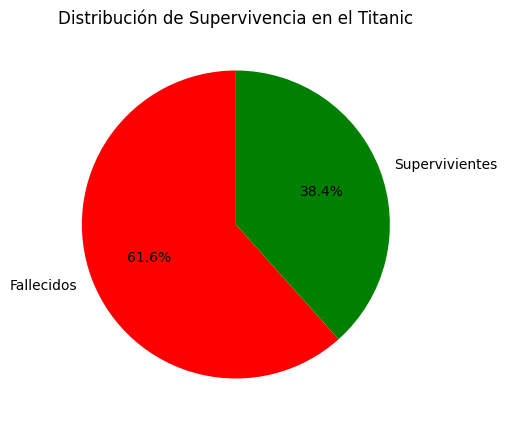

In [4]:
titanic_df = pd.read_csv('titanic.csv')

survival_counts = titanic_df['Survived'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(survival_counts, labels=['Fallecidos', 'Supervivientes'], autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Distribución de Supervivencia en el Titanic')
plt.show()

- Histograma con las edades.

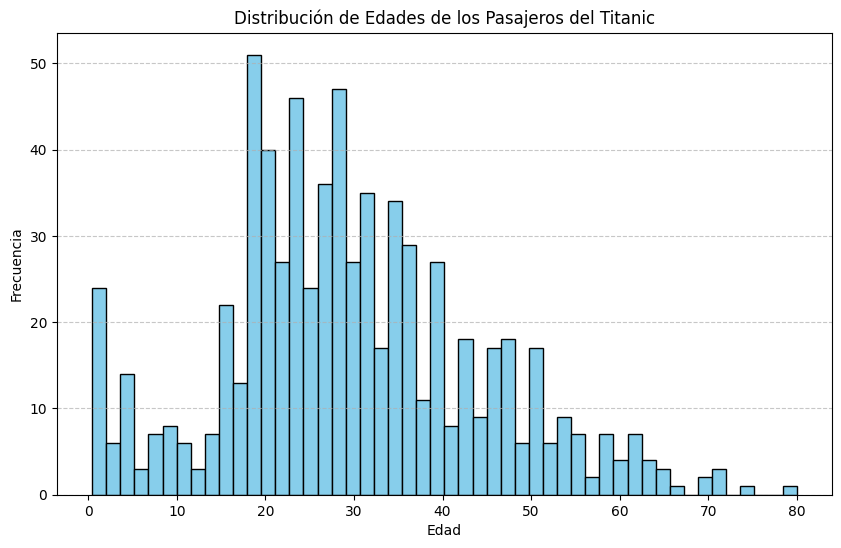

In [5]:
edades = titanic_df['Age'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(edades, bins=50, edgecolor='black', color='skyblue')
plt.title('Distribución de Edades de los Pasajeros del Titanic')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Diagrama de barras con el número de personas en cada clase.


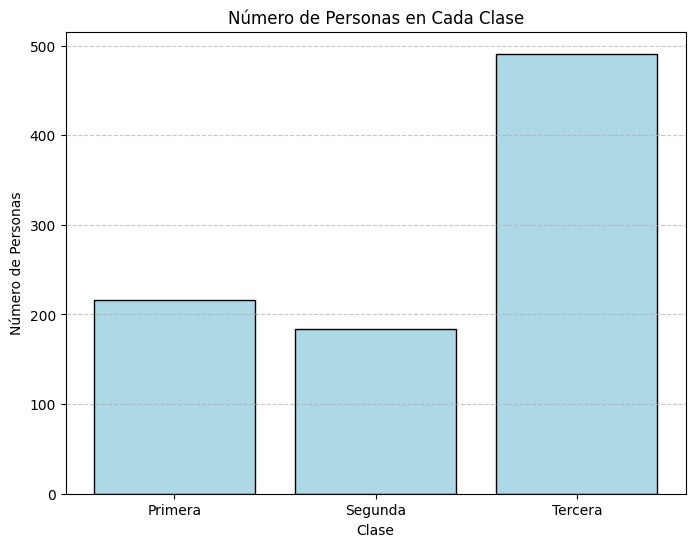

In [6]:
class_counts = titanic_df['Pclass'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color='lightblue', edgecolor='black')
plt.title('Número de Personas en Cada Clase')
plt.xlabel('Clase')
plt.ylabel('Número de Personas')
plt.xticks([1, 2, 3], ['Primera', 'Segunda', 'Tercera'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Diagrama de barras con el número de personas fallecidas y supervivientes en cada clase.

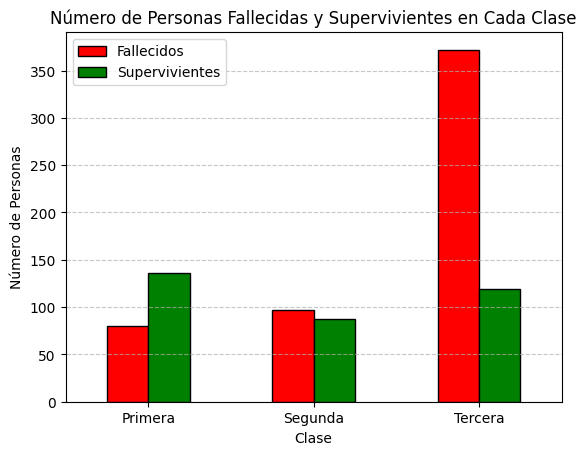

In [10]:
# Agrupar por clase y estado de supervivencia, y contar el número de personas en cada grupo
survival_by_class = titanic_df.groupby(['Pclass', 'Survived']).size().unstack()

# Crear el diagrama de barras
survival_by_class.plot(kind='bar', stacked=False, color=['red', 'green'], edgecolor='black')

plt.title('Número de Personas Fallecidas y Supervivientes en Cada Clase')
plt.xlabel('Clase')
plt.ylabel('Número de Personas')
plt.xticks([0, 1, 2], ['Primera', 'Segunda', 'Tercera'], rotation=0)
plt.legend(['Fallecidos', 'Supervivientes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [1]:
#Para realizar algunos de los siguientes ejercicios, usaremos principalmente el conjunto de datos tips de Seaborn. El código para cargar los datos:
import seaborn as sns
df = sns.load_dataset('tips')

6. Usando el dataset tips de Seaborn, crea una figura con 2 filas y tres columnas en el que sitúes las siguientes gráficas:
- Un gráfico de barras que muestre el total de la cuenta (total_bill) por día (day).
- Un gráfico de líneas que muestre la relación entre el total de la cuenta (total_bill) y la propina (tip). Muestra también con una línea la propina media.
- Un gráfico de dispersión entre el total de la cuenta (total_bill) y la propina (tip).
- Un gráfico circular que muestre la distribución del total de la cuenta por sexo.
- Un histograma para la distribución del total de la cuenta (total_bill). 
- Un gráfico de caja y bigotes con los valores de las propinas (tip) en función del día de la semana (day).
**Requisitos de personalización:**
- Añade títulos y etiquetas a los ejes en cada subgráfico.
- Ajusta el espacio entre los subgráficos para que no se solapen.


- Un gráfico de barras que muestre el total de la cuenta (total_bill) por día (day).


/tmp/ipykernel_10146/3989237057.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day')['total_bill'].sum().plot(kind='bar', ax=axs[0, 0], color='skyblue', edgecolor='black')
/tmp/ipykernel_10146/3989237057.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_bill_by_sex = df.groupby('sex')['total_bill'].sum()
/tmp/ipykernel_10146/3989237057.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day', y='tip', data=df, ax=axs[1, 2], palette

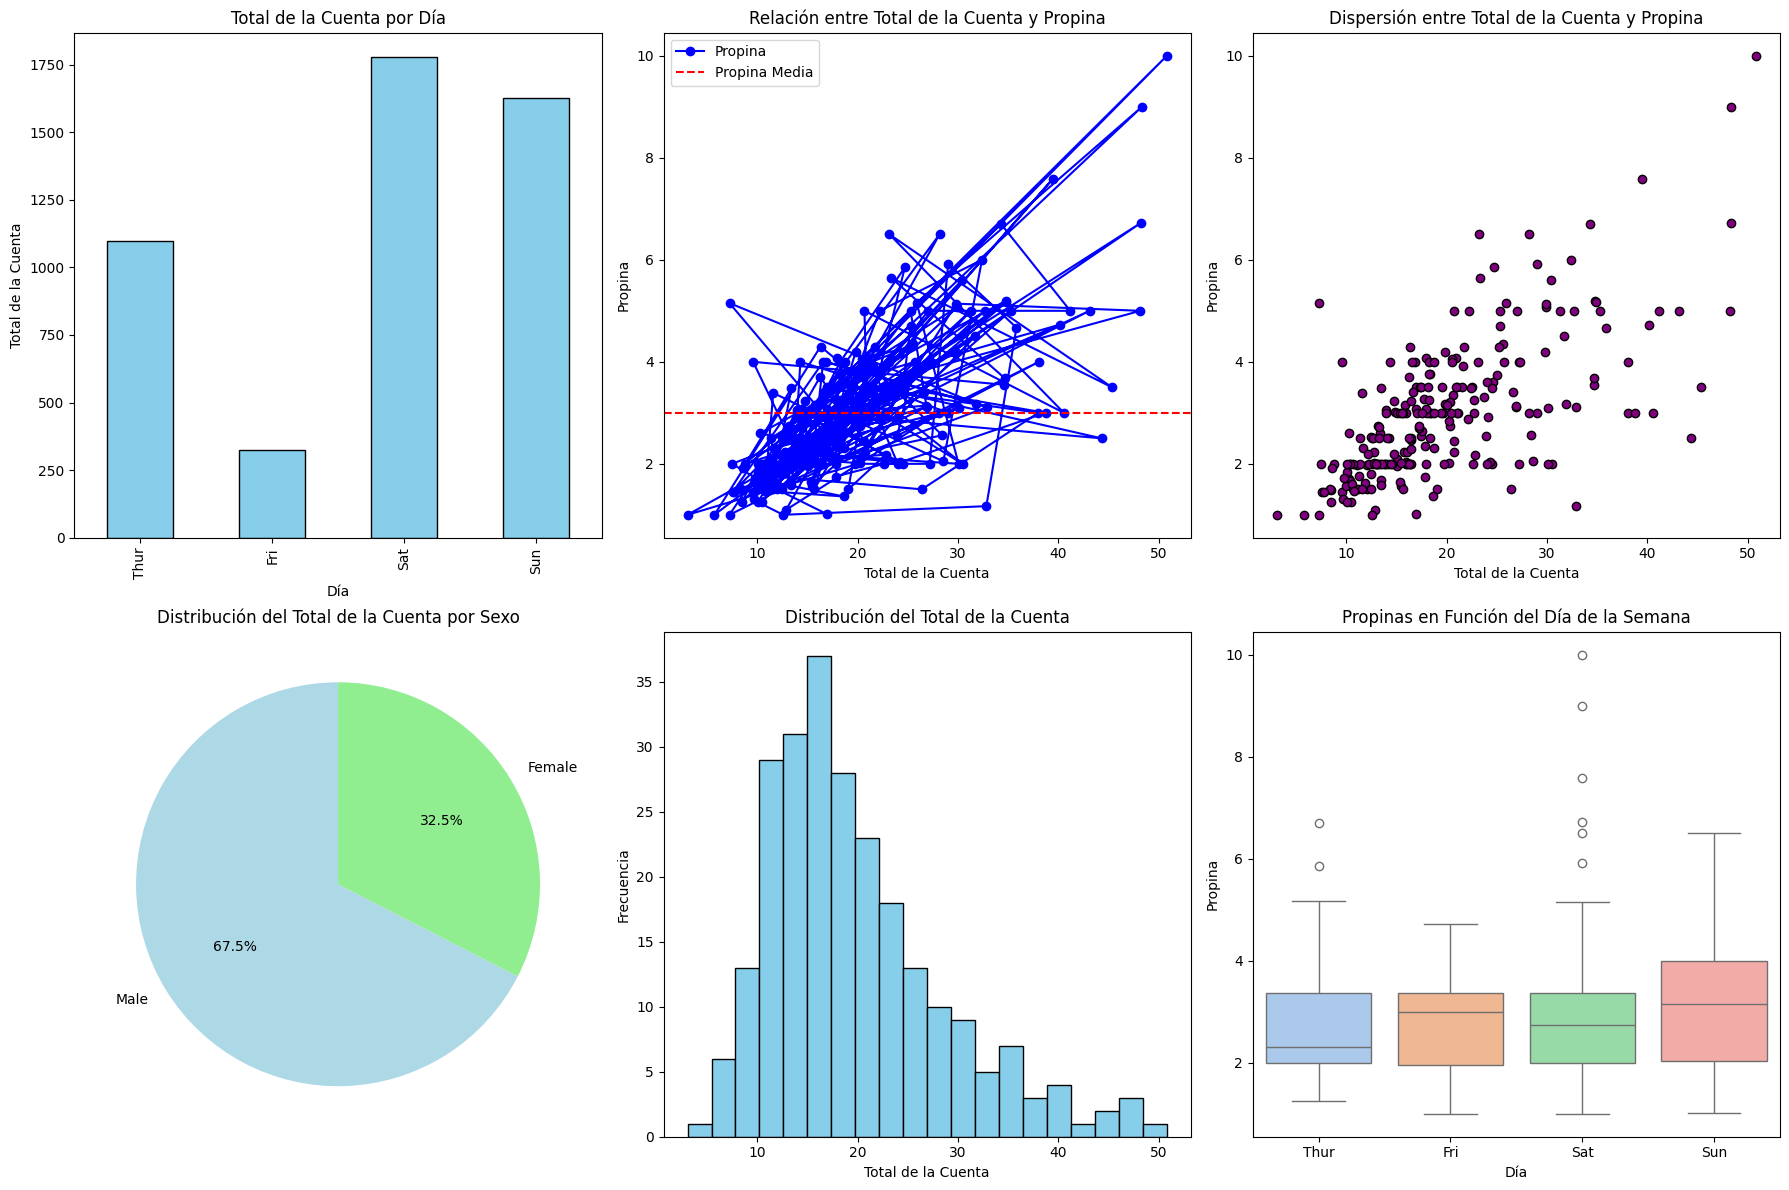

In [29]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Gráfico de barras que muestra el total de la cuenta (total_bill) por día (day)
df.groupby('day')['total_bill'].sum().plot(kind='bar', ax=axs[0, 0], color='skyblue', edgecolor='black')
axs[0, 0].set_title('Total de la Cuenta por Día')
axs[0, 0].set_xlabel('Día')
axs[0, 0].set_ylabel('Total de la Cuenta')

# Gráfico de líneas que muestra la relación entre el total de la cuenta (total_bill) y la propina (tip)
axs[0, 1].plot(df['total_bill'], df['tip'], linestyle='-', marker='o', color='blue', label='Propina')
axs[0, 1].axhline(df['tip'].mean(), color='red', linestyle='--', label='Propina Media')
axs[0, 1].set_title('Relación entre Total de la Cuenta y Propina')
axs[0, 1].set_xlabel('Total de la Cuenta')
axs[0, 1].set_ylabel('Propina')
axs[0, 1].legend()

# Gráfico de dispersión entre el total de la cuenta (total_bill) y la propina (tip)
axs[0, 2].scatter(df['total_bill'], df['tip'], color='purple', edgecolor='black')
axs[0, 2].set_title('Dispersión entre Total de la Cuenta y Propina')
axs[0, 2].set_xlabel('Total de la Cuenta')
axs[0, 2].set_ylabel('Propina')

# Gráfico circular que muestra la distribución del total de la cuenta por sexo
total_bill_by_sex = df.groupby('sex')['total_bill'].sum()
axs[1, 0].pie(total_bill_by_sex, labels=total_bill_by_sex.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
axs[1, 0].set_title('Distribución del Total de la Cuenta por Sexo')

# Histograma para la distribución del total de la cuenta (total_bill)
axs[1, 1].hist(df['total_bill'], bins=20, edgecolor='black', color='skyblue')
axs[1, 1].set_title('Distribución del Total de la Cuenta')
axs[1, 1].set_xlabel('Total de la Cuenta')
axs[1, 1].set_ylabel('Frecuencia')

# Gráfico de caja y bigotes con los valores de las propinas (tip) en función del día de la semana (day)
sns.boxplot(x='day', y='tip', data=df, ax=axs[1, 2], palette='pastel')
axs[1, 2].set_title('Propinas en Función del Día de la Semana')
axs[1, 2].set_xlabel('Día')
axs[1, 2].set_ylabel('Propina')

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
plt.show()

7. Usando el dataset tips de Seaborn, crea un gráfico de barras apiladas para mostrar cómo se distribuyen las propinas por día y por sexo.
Personaliza el gráfico añadiendo un título, etiquetas a los ejes y ajustando los colores de las barras.


/tmp/ipykernel_10146/3447022431.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_by_day_sex = df.groupby(['day', 'sex'])['tip'].sum().unstack()


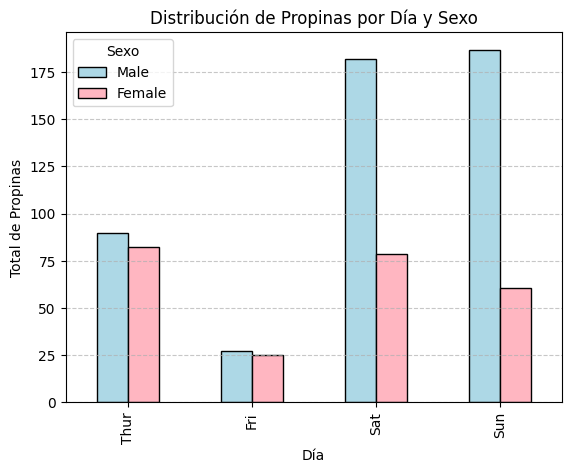

In [ ]:
tips_by_day_sex = df.groupby(['day', 'sex'])['tip'].sum().unstack()

tips_by_day_sex.plot(kind='bar', stacked=False, color=['lightblue', 'lightpink'], edgecolor='black')

plt.title('Distribución de Propinas por Día y Sexo')
plt.xlabel('Día')
plt.ylabel('Total de Propinas')
plt.legend(title='Sexo')
plt.grid(axis='y', linestyle='--', alpha=0.8)

plt.show()

8. Usando el dataset tips de Seaborn, crea un gráfico de líneas en el que se representen dos series:
- La relación entre total_bill y tip.
- La relación entre total_bill y el tamaño de la mesa (size).

Añade una leyenda que identifique las dos series y personaliza el gráfico añadiendo un título y etiquetas a los ejes.

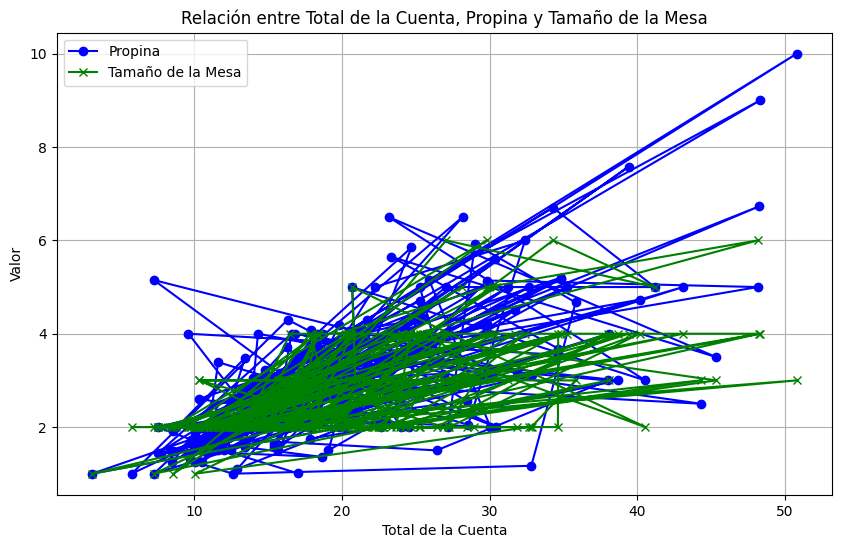

In [33]:
plt.figure(figsize=(10, 6))

plt.plot(df['total_bill'], df['tip'], linestyle='-', marker='o', color='blue', label='Propina')

plt.plot(df['total_bill'], df['size'], linestyle='-', marker='x', color='green', label='Tamaño de la Mesa')

plt.title('Relación entre Total de la Cuenta, Propina y Tamaño de la Mesa')
plt.xlabel('Total de la Cuenta')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)

plt.show()

9. Usando el dataset tips de Seaborn, crea un gráfico de dispersión entre total_bill y tip. 

- Asigna colores diferentes a los puntos del gráfico según el género (sex) del cliente, utilizando color='blue' para los hombres y color='red' para las mujeres. 

- Personaliza el gráfico añadiendo un título, etiquetas a los ejes y una leyenda.


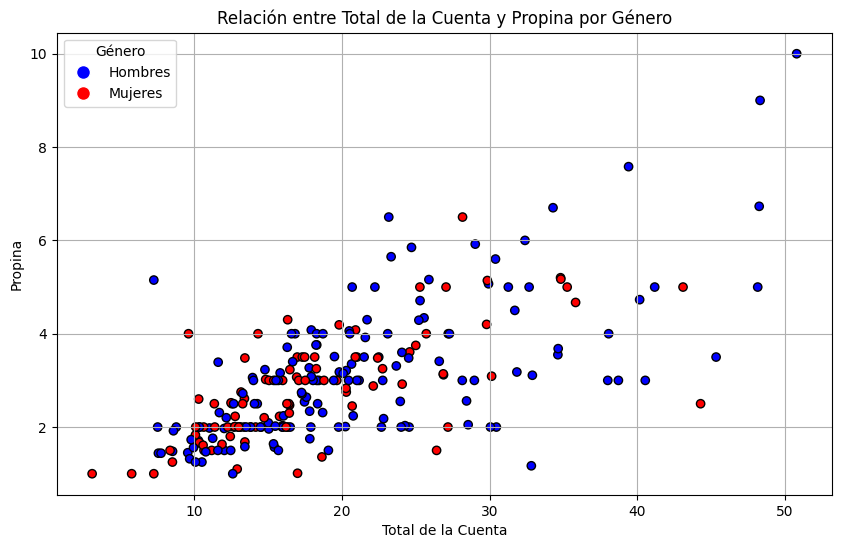

In [ ]:
plt.figure(figsize=(10, 6))

colors = df['sex'].map({'Male': 'blue', 'Female': 'red'})

plt.scatter(df['total_bill'], df['tip'], c=colors, edgecolor='black')

plt.title('Relación entre Total de la Cuenta y Propina por Género')
plt.xlabel('Total de la Cuenta')
plt.ylabel('Propina')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Hombres'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Mujeres')]
plt.legend(handles=handles, title='Género')

plt.grid(True)
plt.show()

10. Usando el dataset tips de Seaborn, crea una figura con subgráficos que contengan diferentes tipos de gráficos.
- En el primer subgráfico, crea un gráfico de barras que muestre la relación entre day y total_bill.
- En el segundo subgráfico, crea un gráfico circular que muestre la distribución de total_bill entre los géneros (sex).
- Personaliza ambos gráficos con títulos, etiquetas en los ejes y ajuste del espacio entre los gráficos.


/tmp/ipykernel_15890/64366557.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day')['total_bill'].sum().plot(kind='bar', ax=axs[0], color='skyblue', edgecolor='black')
/tmp/ipykernel_15890/64366557.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_bill_by_sex = df.groupby('sex')['total_bill'].sum()


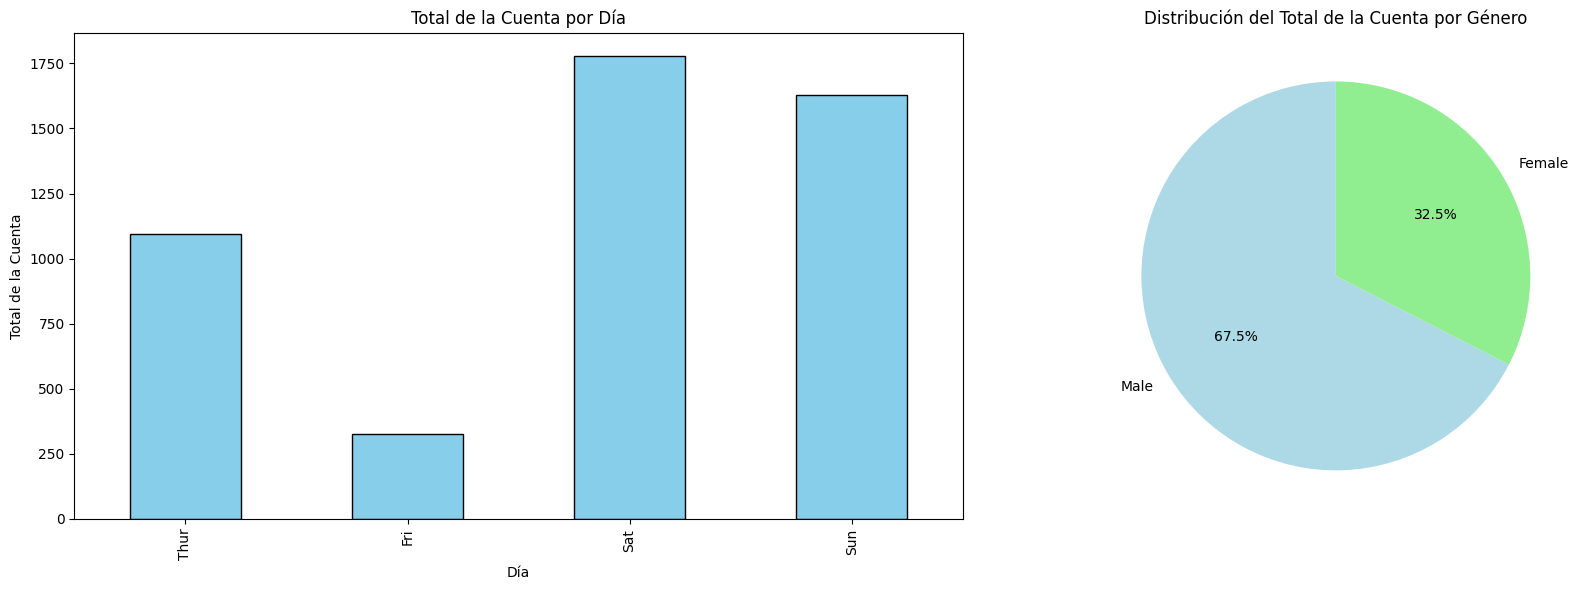

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

df.groupby('day')['total_bill'].sum().plot(kind='bar', ax=axs[0], color='skyblue', edgecolor='black')
axs[0].set_title('Total de la Cuenta por Día')
axs[0].set_xlabel('Día')
axs[0].set_ylabel('Total de la Cuenta')

total_bill_by_sex = df.groupby('sex')['total_bill'].sum()
axs[1].pie(total_bill_by_sex, labels=total_bill_by_sex.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
axs[1].set_title('Distribución del Total de la Cuenta por Género')

plt.tight_layout()
plt.show()

11. Usando el dataset tips de Seaborn, crea un gráfico de de dispersión que muestre la relación entre total_bill y tip.
- Ajusta una línea de tendencia (regresión lineal) a los datos utilizando scipy.stats.linregress().
- Muestra la línea de tendencia en el gráfico junto con los puntos de dispersión.
- Personaliza el gráfico con un título, etiquetas a los ejes y una leyenda que indique la línea de tendencia.

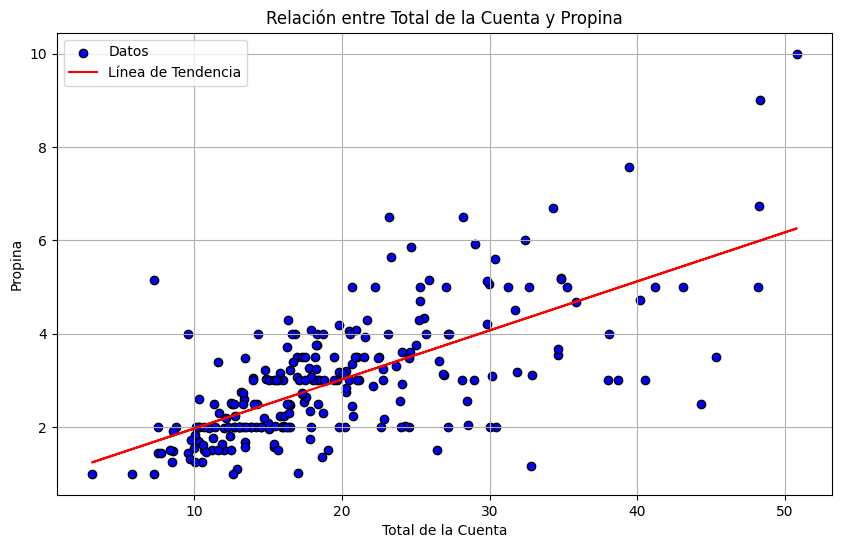

In [5]:
from scipy.stats import linregress

# Calcular la regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(df['total_bill'], df['tip'])

# Crear los valores de la línea de tendencia
line = slope * df['total_bill'] + intercept

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['total_bill'], df['tip'], color='blue', edgecolor='black', label='Datos')

# Añadir la línea de tendencia
plt.plot(df['total_bill'], line, color='red', label='Línea de Tendencia')

# Personalizar el gráfico
plt.title('Relación entre Total de la Cuenta y Propina')
plt.xlabel('Total de la Cuenta')
plt.ylabel('Propina')
plt.legend()
plt.grid(True)

plt.show()